<a href="https://colab.research.google.com/github/liliansom/med_ind/blob/main/med_ind_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atividades a serem desenvolvidas:

1. Limpeza e Pré-processamento de Dados:

* Lidar com valores ausentes: Decidir se vai imputar, preencher ou remover linhas/colunas com dados faltantes.
* Tratar outliers: Identificar e lidar com outliers que podem distorcer a análise.
* Converter tipos de dados, se necessário, garantindo que colunas relacionadas a datas estejam no formato correto.

2. Análise Exploratória de Dados (EDA):
* Tendências de Vendas:
  * Vendas mensais: Identificar se há meses com vendas excepcionalmente altas ou baixas.
  * Análise por estado (UF_VENDA): Quais estados têm o maior número de vendas? Existem padrões regionais?
  * Produtos Mais Vendidos:
    Baseado no PRINCIPIO_ATIVO: Quais são os medicamentos mais populares?

    Baseado na DESCRICAO_APRESENTACAO: Quais apresentações ou dosagens são mais vendidas?
  * Demografia dos Consumidores:
    Distribuição de idade dos compradores.
    Distribuição de gênero dos compradores.
  * Correlações:
    Existe uma correlação entre o tipo de medicamento e a idade do comprador?
    Existe uma correlação entre o gênero do comprador e o tipo de medicamento?

3. Visualização de Dados:
* Gráficos de barras para mostrar as vendas por estado, por medicamento e por gênero.
* Histogramas para distribuição de idade.
* Heatmaps para correlações.
* Gráficos de linha para tendências de vendas ao longo dos meses.

4. Insights e Recomendações:
* Com base na EDA, identifique insights interessantes sobre os hábitos de compra e padrões.
* Formule recomendações para farmácias ou empresas farmacêuticas com base nas tendências observadas.

# Importando base e bibliotecas

In [1]:
# from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

    # drive.mount('/content/drive')

In [2]:
# %cd '/content/drive/My Drive/Colab Notebooks/med_ind_2021_11/EDA_Industrializados_202111.csv'

In [6]:
# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/med_ind_2021_11/EDA_Industrializados_202111.csv', encoding='latin1', delimiter=';')
# df = pd.read_csv('data/EDA_Industrializados_202111.csv', encoding='latin1', delimiter=';')
df = pd.read_csv('data/EDA_Industrializados_202111_sample.csv', encoding='latin1', delimiter=',')



In [7]:
display(df)

,Unnamed: 0,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
0,5310,2021,11,CE,FORTALEZA,OXCARBAZEPINA,300 MG COM REV CT BL AL AL X 30,3,CAIXA,CRM,CE,1.0,NaN,NaN,NaN,NaN
1,3356,2021,11,RJ,RIO DE JANEIRO,CLORIDRATO DE MOXIFLOXACINO,5 MG/ML SOL OFT CT FR PLAS TRANS GOT X 5 ML,1,CAIXA,CRM,RJ,5.0,NaN,2.0,50.0,1.0
2,137131,2021,11,RJ,RIO DE JANEIRO,SULFADIAZINA DE PRATA,10 MG / G CREM DERM CT BG AL REV X 50 GÂ Â,2,CAIXA,CRM,RJ,5.0,NaN,2.0,75.0,1.0
3,202348,2021,11,PR,ROLÃNDIA,ALPRAZOLAM,2 MG COM CT BL AL PLAS INC X 30,4,FRASCO,CRM,PR,2.0,NaN,NaN,NaN,NaN
4,152609,2021,11,RJ,SÃO GONÃALO,AMOXICILINA + CLAVULANATO DE POTÃSSIO,(500+125) MG COM REV CT STR AL/AL X 18,2,CAIXA,CRM,RJ,5.0,NaN,1.0,23.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,125609,2021,11,MG,SENADOR MODESTINO GONÃALVES,CLONAZEPAM,"2,5 MG/ML SOL OR CT FR PET AMB GOT X 20 ML",2,CAIXA,CRM,MG,2.0,NaN,NaN,NaN,NaN
199996,164823,2021,11,RJ,SÃO GONÃALO,CLONAZEPAM,"2,5 MG/ML SOL OR CT FR GOT VD AMB X 20 ML",3,FRASCO,CRM,RJ,1.0,NaN,NaN,NaN,NaN
199997,176110,2021,11,RJ,PARATY,CELECOXIBE,200 MG CAP DURA CT BL AL PLAS TRANS X 15,2,CAIXA,CRM,RJ,1.0,NaN,NaN,NaN,NaN
199998,121939,2021,11,PA,ALTAMIRA,LEVOFLOXACINO,750 MG COM REV CT BL AL PLAS INC X 7,1,CAIXA,CRM,PA,5.0,NaN,2.0,50.0,1.0


# Dicionário de Dados

* ANO_VENDA: Ano da venda do medicamento.
* MES_VENDA: Mês da venda do medicamento.
* UF_VENDA: Unidade Federativa do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, representando a UF onde ocorreu a venda.
* MUNICIPIO_VENDA: Município do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, representando o Município onde ocorreu a venda.
* PRINCIPIO_ATIVO: Nome do princípio ativo do medicamento industrializado, conforme cadastrado no registro do medicamento, no banco de dados da Anvisa. Quando um medicamento tem mais de um princípio ativo, cada
um deles é separado pelo caractere “+”.
* DESCRICAO_APRESENTACAO: Uma Apresentação de Medicamento representa O modo como um medicamento é apresentado na embalagem.
* QTD_VENDIDA: Quantidade vendida de caixas ou frascos do medicamento.
* UNIDADE_MEDIDA: Indica se a quantidade vendida do medicamento foi de caixas ou frascos.
* CONSELHO_PRESCRITOR: Conselho de Classe do profissional que prescreveu o medicamento vendido.
* UF_CONSELHO_PRESCRITOR: Unidade Federativa do Conselho de Classe do profissional que prescreveu o medicamento vendido.
* TIPO_RECEITUARIO: Tipo de receituário utilizado na prescrição. Valores e respectivos tipos de receituário:
(1) Receita de Controle Especial em 2 vias (Receita Branca);
(2) Notificação de Receita B (Notificação Azul);
(3) Notificação de Receita Especial (Notificação Branca);
(4) Notificação de Receita A (Notificação Amarela);
(5) Receita Antimicrobiano em 2 vias.
* CID10: Classificação Internacional de Doença (aplicável apenas a medicamentos antimicrobianos).
* SEXO: Sexo do paciente (aplicável apenas a medicamentos
antimicrobianos). (1) sexo masculino, (2) sexo feminino.
* IDADE: Valor numérico que representa a idade do paciente, em meses ou anos (aplicável apenas a medicamentos antimicrobianos).
* UNIDADE_IDADE: Unidade de medida da idade do paciente, que pode ser em meses ou anos (aplicável apenas a medicamentos
antimicrobianos). (1) unidade de medida em anos,
(2) unidade de medida em meses.

# Análise Exploratória dos Dados

In [8]:
df.shape

(200000, 16)

In [9]:
# Tipos das colunas
df.dtypes

Unnamed: 0                  int64
ANO_VENDA                   int64
MES_VENDA                   int64
UF_VENDA                   object
MUNICIPIO_VENDA            object
PRINCIPIO_ATIVO            object
DESCRICAO_APRESENTACAO     object
QTD_VENDIDA                 int64
UNIDADE_MEDIDA             object
CONSELHO_PRESCRITOR        object
UF_CONSELHO_PRESCRITOR     object
TIPO_RECEITUARIO          float64
CID10                      object
SEXO                      float64
IDADE                     float64
UNIDADE_IDADE             float64
dtype: object

In [10]:
# Valores nulos
df.isnull().sum()

Unnamed: 0                     0
ANO_VENDA                      0
MES_VENDA                      0
UF_VENDA                       0
MUNICIPIO_VENDA                0
PRINCIPIO_ATIVO              381
DESCRICAO_APRESENTACAO         0
QTD_VENDIDA                    0
UNIDADE_MEDIDA                 0
CONSELHO_PRESCRITOR            0
UF_CONSELHO_PRESCRITOR         0
TIPO_RECEITUARIO               0
CID10                     199796
SEXO                       68884
IDADE                      68884
UNIDADE_IDADE              68884
dtype: int64

In [11]:
df.describe()

,Unnamed: 0,ANO_VENDA,MES_VENDA,QTD_VENDIDA,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE
count,200000.000000,200000.0,200000.0,200000.00000,200000.000000,131116.000000,131116.000000,131116.00000
mean,102361.238380,2021.0,11.0,4.04790,3.386975,1.548865,40.155870,1.01806
std,59095.482192,0.0,0.0,28.88496,1.851135,0.497608,39.314272,0.13317
min,0.000000,2021.0,11.0,1.00000,1.000000,1.000000,0.000000,1.00000
25%,51211.750000,2021.0,11.0,1.00000,1.000000,1.000000,25.000000,1.00000
50%,102346.500000,2021.0,11.0,1.00000,5.000000,2.000000,39.000000,1.00000
75%,153517.250000,2021.0,11.0,3.00000,5.000000,2.000000,55.000000,1.00000
max,204750.000000,2021.0,11.0,4706.00000,5.000000,2.000000,999.000000,2.00000


In [12]:
df_new = df.copy()

# Tratamento dos Dados

## Nulos
* CID10: Aplicado apenas para medicamentos antimicrobianos. Conclusão: Retirar coluna do CID10.
* Princípio Ativo dá para ver o que fazer. Conclusão: Imputar "Não informado".
* Sexo, Idade, Unidade_Idade são campos preenchidos apenas quando medicamentos antimicrobianos. Imputar 0 neles.

## Tipos
* SEXO, TIPO_RECEITUARIO e UNIDADE_MEDIDA estão como float, deveriam ser int
* ANO_VENDA e MES_VENDA estão como int, inserir como date. Apesar de que não será realizada nenhuma comparação no momento...

## Outliers
* IDADE: Analisar boxplot separando pela UNIDADE_MEDIDA
* QTD_VENDIDA: Analisar boxplot



## Tratamento Valores Nulos e Tipos de colunas

In [13]:
# Retirando coluna CID10
df_new = df_new.drop('CID10', axis=1)

# Imputando valores
df_new['SEXO'].fillna(0, inplace=True)
df_new['IDADE'].fillna(0, inplace=True)
df_new['TIPO_RECEITUARIO'].fillna(0, inplace=True)
df_new['UNIDADE_IDADE'].fillna(0, inplace=True)
df_new['PRINCIPIO_ATIVO'].fillna('INDEFINIDO', inplace=True)


# Tratando tipo de colunas
df_new['SEXO'] = df_new['SEXO'].astype(int)
df_new['UNIDADE_IDADE'] = df_new['UNIDADE_IDADE'].astype(int)
df_new['TIPO_RECEITUARIO'] = df_new['TIPO_RECEITUARIO'].astype(int)
df_new['IDADE'] = df_new['IDADE'].astype(int)

df_new['ANO_VENDA'] = pd.to_datetime(df_new['ANO_VENDA'], format='%Y')
df_new['ANO_VENDA'] = df_new['ANO_VENDA'].dt.year
df_new['MES_VENDA'] = pd.to_datetime(df_new['MES_VENDA'], format='%m')
df_new['MES_VENDA'] = df_new['MES_VENDA'].dt.month

## Outliers Idade

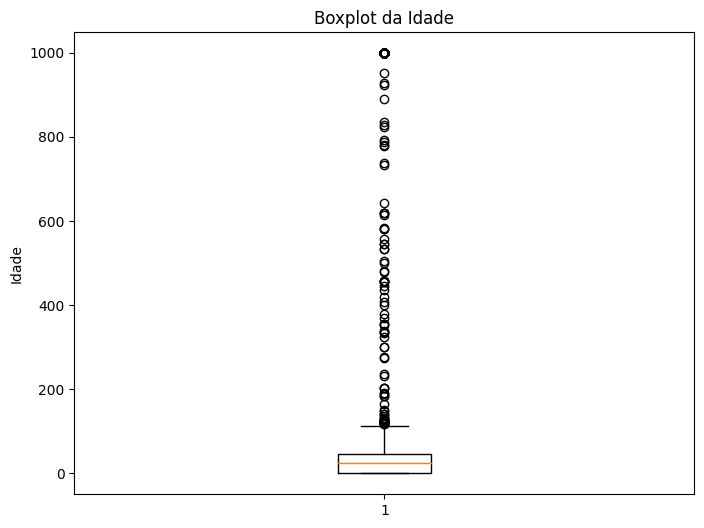

In [14]:
plt.figure(figsize=(8, 6))  # Define o tamanho da figura (opcional)
plt.boxplot(df_new['IDADE'])
plt.title('Boxplot da Idade')
plt.ylabel('Idade')
plt.show()

In [15]:
# UNIDADE_IDADE = Anos
out_idade = df_new[df_new['UNIDADE_IDADE'] == 1]
out_idade['UNIDADE_IDADE'].value_counts()

1    128748
Name: UNIDADE_IDADE, dtype: int64

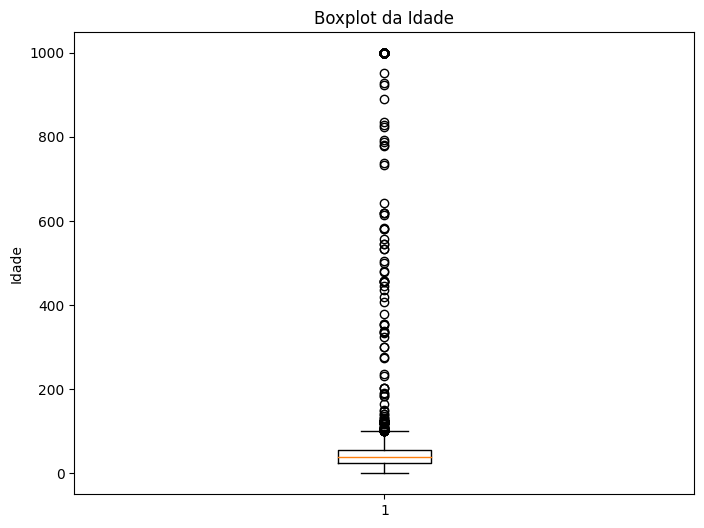

In [16]:
plt.figure(figsize=(8, 6))  # Define o tamanho da figura (opcional)
plt.boxplot(out_idade['IDADE'])
plt.title('Boxplot da Idade')
plt.ylabel('Idade')
plt.show()

In [17]:
# UNIDADE_IDADE = Meses
out_idade = df_new[df_new['UNIDADE_IDADE'] == 2]
out_idade['UNIDADE_IDADE'].value_counts()

2    2368
Name: UNIDADE_IDADE, dtype: int64

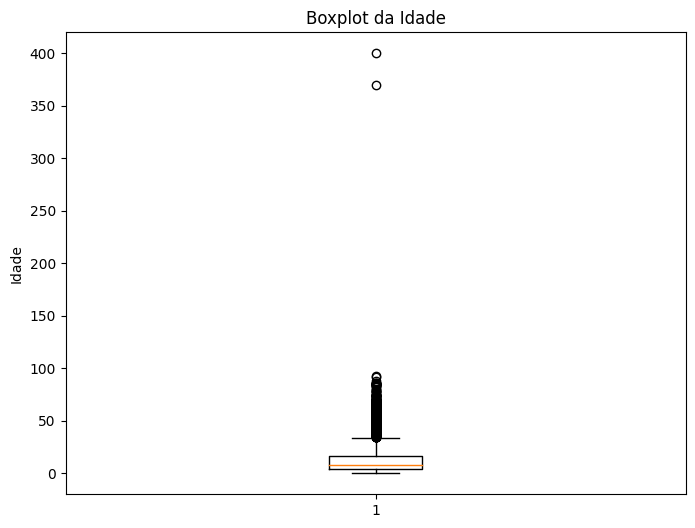

In [18]:
plt.figure(figsize=(8, 6))  # Define o tamanho da figura (opcional)
plt.boxplot(out_idade['IDADE'])
plt.title('Boxplot da Idade')
plt.ylabel('Idade')
plt.show()

In [19]:
out_idade = df_new[df_new['UNIDADE_IDADE'] == 2]
display(out_idade['IDADE'])

7          6
17         1
31        20
89        63
148       41
          ..
199413     9
199415     1
199678     8
199789     0
199905     1
Name: IDADE, Length: 2368, dtype: int32

In [20]:
# Calcular o primeiro quartil (Q1) e o terceiro quartil (Q3)
Q1 = df_new['IDADE'].quantile(0.25)
Q3 = df_new['IDADE'].quantile(0.75)

# Calcular o IQR
IQR = Q3 - Q1

# Calcular o limite superior
LS = Q3 + 1.5 * IQR

# Filtrar o DataFrame para remover outliers
df_filtrado = df_new[df_new['IDADE'] <= LS]

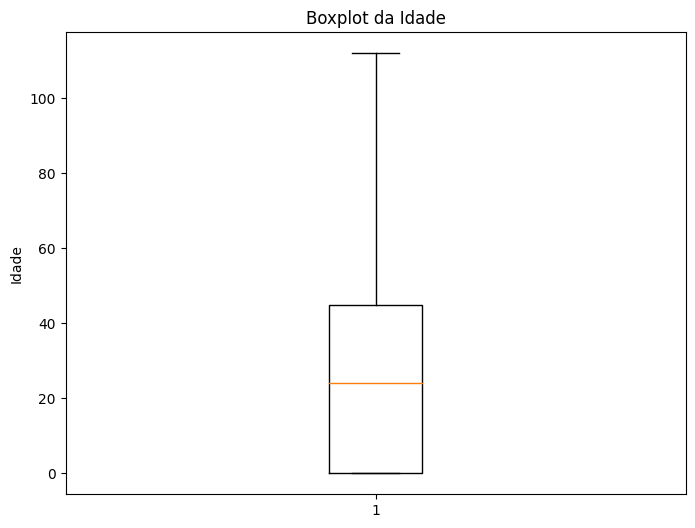

In [21]:
plt.figure(figsize=(8, 6))  # Define o tamanho da figura (opcional)
plt.boxplot(df_filtrado['IDADE'])
plt.title('Boxplot da Idade')
plt.ylabel('Idade')
plt.show()

## Outliers QTD_VENDIDA

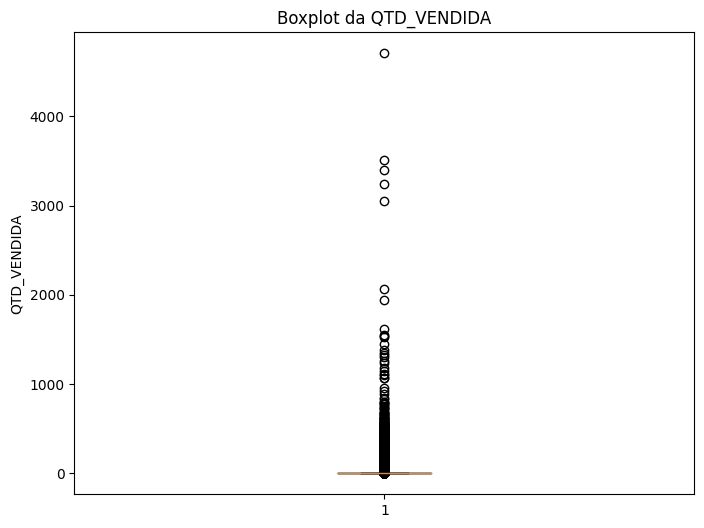

In [22]:
plt.figure(figsize=(8, 6))  # Define o tamanho da figura (opcional)
plt.boxplot(df_filtrado['QTD_VENDIDA'])
plt.title('Boxplot da QTD_VENDIDA')
plt.ylabel('QTD_VENDIDA')
plt.show()

In [23]:
# Calcular o primeiro quartil (Q1) e o terceiro quartil (Q3)
Q1 = df_filtrado['QTD_VENDIDA'].quantile(0.25)
Q3 = df_filtrado['QTD_VENDIDA'].quantile(0.75)

# Calcular o IQR
IQR = Q3 - Q1

# Calcular o limite superior
LS = Q3 + 1.5 * IQR

# Filtrar o DataFrame para remover outliers
df_filtrado = df_filtrado[df_filtrado['QTD_VENDIDA'] <= LS]

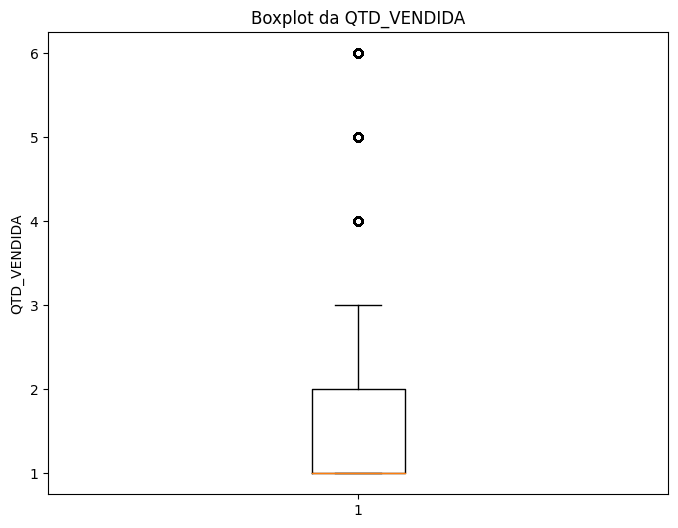

In [24]:
plt.figure(figsize=(8, 6))  # Define o tamanho da figura (opcional)
plt.boxplot(df_filtrado['QTD_VENDIDA'])
plt.title('Boxplot da QTD_VENDIDA')
plt.ylabel('QTD_VENDIDA')
plt.show()

In [25]:
display(df_filtrado)

,Unnamed: 0,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE
0,5310,2021,11,CE,FORTALEZA,OXCARBAZEPINA,300 MG COM REV CT BL AL AL X 30,3,CAIXA,CRM,CE,1,0,0,0
1,3356,2021,11,RJ,RIO DE JANEIRO,CLORIDRATO DE MOXIFLOXACINO,5 MG/ML SOL OFT CT FR PLAS TRANS GOT X 5 ML,1,CAIXA,CRM,RJ,5,2,50,1
2,137131,2021,11,RJ,RIO DE JANEIRO,SULFADIAZINA DE PRATA,10 MG / G CREM DERM CT BG AL REV X 50 GÂ Â,2,CAIXA,CRM,RJ,5,2,75,1
3,202348,2021,11,PR,ROLÃNDIA,ALPRAZOLAM,2 MG COM CT BL AL PLAS INC X 30,4,FRASCO,CRM,PR,2,0,0,0
4,152609,2021,11,RJ,SÃO GONÃALO,AMOXICILINA + CLAVULANATO DE POTÃSSIO,(500+125) MG COM REV CT STR AL/AL X 18,2,CAIXA,CRM,RJ,5,1,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,125609,2021,11,MG,SENADOR MODESTINO GONÃALVES,CLONAZEPAM,"2,5 MG/ML SOL OR CT FR PET AMB GOT X 20 ML",2,CAIXA,CRM,MG,2,0,0,0
199996,164823,2021,11,RJ,SÃO GONÃALO,CLONAZEPAM,"2,5 MG/ML SOL OR CT FR GOT VD AMB X 20 ML",3,FRASCO,CRM,RJ,1,0,0,0
199997,176110,2021,11,RJ,PARATY,CELECOXIBE,200 MG CAP DURA CT BL AL PLAS TRANS X 15,2,CAIXA,CRM,RJ,1,0,0,0
199998,121939,2021,11,PA,ALTAMIRA,LEVOFLOXACINO,750 MG COM REV CT BL AL PLAS INC X 7,1,CAIXA,CRM,PA,5,2,50,1


# Análise Descritiva

## 10 Estados que mais venderam medicamentos

In [26]:
display(df_new['UF_VENDA'].value_counts().sort_values(ascending=False).head(10).reset_index(drop=False))

,index,UF_VENDA
0,RJ,70898
1,SP,27470
2,SC,15448
3,PA,14975
4,PR,14291
5,MG,11305
6,PB,10577
7,ES,9741
8,RN,7572
9,MT,6586


## 10 Medicamentos mais vendidos

In [27]:
display(df_new['PRINCIPIO_ATIVO'].value_counts().sort_values(ascending=False).head(10).reset_index(drop=False))

,index,PRINCIPIO_ATIVO
0,AZITROMICINA DI-HIDRATADA,12615
1,AMOXICILINA TRI-HIDRATADA,8153
2,AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POT...,7432
3,AMOXICILINA + CLAVULANATO DE POTÃSSIO,5288
4,CLONAZEPAM,5287
5,CEFALEXINA,4987
6,OXALATO DE ESCITALOPRAM,4893
7,CEFALEXINA MONOIDRATADA,4867
8,ALPRAZOLAM,3894
9,SULFAMETOXAZOL + TRIMETOPRIMA,3737


## 10 Apresentações mais vendidas

In [28]:
display(df_new['DESCRICAO_APRESENTACAO'].value_counts().sort_values(ascending=False).head(10).reset_index(drop=False))

,index,DESCRICAO_APRESENTACAO
0,500 MG CAP DURA CT BL AL PLAS TRANS X 21,5890
1,500 MG COM REV CT BL AL PLAS TRANS X 14,4628
2,500 MG COM CT BL AL PLAS TRANS X 10,2346
3,500 MG COM REV CT BL AL PLAS PVC TRANS X 5,2210
4,875 MG + 125 MG COM REV CT FR VD AMB X 14,2032
5,100 MG CAP GEL DURA CT BL AL PLAS TRANS X 28,1410
6,500MG COM REV CT BL AL PLAS LEIT X 10,1399
7,875 MG + 125 MG COM REV CT BL AL/ AL X 14,1347
8,500 MG COM REV CT BL AL PLAS PVC OPC X 5,1198
9,(5 + 1) MG/ML SOL OFT CT FR GOT PLAS PEBD OPC ...,1198


## Distribuição de idade dos compradores

In [29]:
df_new['IDADE'].value_counts()

0      71495
30      3371
45      3309
35      3081
40      3068
       ...  
455        1
923        1
190        1
339        1
583        1
Name: IDADE, Length: 180, dtype: int64

## Apenas medicamentos antimicrobianos

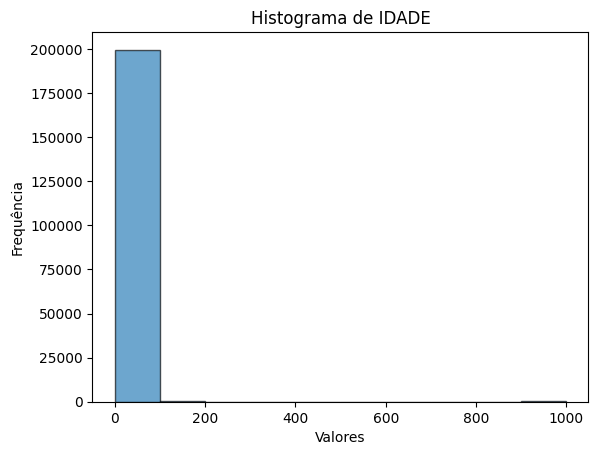

In [30]:
coluna_interesse = 'IDADE'

# Crie um histograma da coluna de interesse
plt.hist(df_new[coluna_interesse], bins=10, edgecolor='k', alpha=0.65)
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title(f'Histograma de {coluna_interesse}')
plt.show()

## Distribuição de gênero dos compradores

In [31]:
df_new['SEXO'].value_counts()

2    71965
0    68884
1    59151
Name: SEXO, dtype: int64

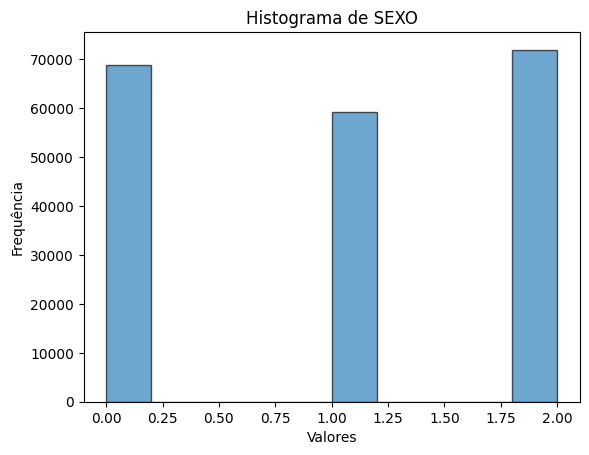

In [32]:
coluna_interesse = 'SEXO'

# Crie um histograma da coluna de interesse
plt.hist(df_new[coluna_interesse], bins=10, edgecolor='k', alpha=0.65)
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title(f'Histograma de {coluna_interesse}')
plt.show()

### Medicamentos mais Vendidos por Faixa Etária

In [34]:
faixa_etaria_inicial = 1
faixa_etaria_final = 121
incremento_faixa_etaria = 10

# Crie uma nova coluna 'FAIXA_ETARIA' com base na 'IDADE'
df_new['FAIXA_ETARIA'] = pd.cut(df_new['IDADE'],
                                    bins=range(faixa_etaria_inicial, faixa_etaria_final+1, incremento_faixa_etaria),
                                    right=False)

# Contar a ocorrência de cada medicamento em cada faixa etária
contagem_medicamentos = df_new.groupby(['FAIXA_ETARIA', 'PRINCIPIO_ATIVO']).size().reset_index(name='Contagem')

# Encontrar o medicamento mais frequente em cada faixa etária
idx = contagem_medicamentos.groupby(['FAIXA_ETARIA'])['Contagem'].transform(max) == contagem_medicamentos['Contagem']
medicamentos_mais_frequentes_faixa_etaria = contagem_medicamentos[idx]

# Exibir os medicamentos mais frequentes por faixa etária
display(medicamentos_mais_frequentes_faixa_etaria)

,FAIXA_ETARIA,PRINCIPIO_ATIVO,Contagem
45,"[1, 11)",AZITROMICINA DI-HIDRATADA,2685
399,"[11, 21)",AZITROMICINA DI-HIDRATADA,996
753,"[21, 31)",AZITROMICINA DI-HIDRATADA,2202
1107,"[31, 41)",AZITROMICINA DI-HIDRATADA,2272
1461,"[41, 51)",AZITROMICINA DI-HIDRATADA,1724
1815,"[51, 61)",AZITROMICINA DI-HIDRATADA,1234
2169,"[61, 71)",AZITROMICINA DI-HIDRATADA,749
2523,"[71, 81)",AZITROMICINA DI-HIDRATADA,332
2859,"[81, 91)",AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POT...,156
3468,"[91, 101)",NITROFURANTOÃNA,42


### 10 Medicamentos mais utilizados por gênero

### Masculino

In [36]:
fr_med_sexo_1 = df_new[df_new['SEXO'] == 1]
fr_med_sexo_1 = fr_med_sexo_1['PRINCIPIO_ATIVO'].value_counts().head(10)
fr_med_sexo_1 = fr_med_sexo_1.reset_index(drop=False)

display(fr_med_sexo_1)

,index,PRINCIPIO_ATIVO
0,AZITROMICINA DI-HIDRATADA,6194
1,AMOXICILINA TRI-HIDRATADA,3902
2,AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POT...,3543
3,AMOXICILINA + CLAVULANATO DE POTÃSSIO,2458
4,CEFALEXINA MONOIDRATADA,2336
5,CEFALEXINA,2213
6,SULFAMETOXAZOL + TRIMETOPRIMA,1720
7,CLORIDRATO DE CIPROFLOXACINO,1527
8,AMOXICILINA,1486
9,AMOXICILINA TRIHIDRATADA,1376


### Feminino

In [37]:
fr_med_sexo_2 = df_new[df_new['SEXO'] == 2]
fr_med_sexo_2 = fr_med_sexo_2['PRINCIPIO_ATIVO'].value_counts().head(10)
fr_med_sexo_2 = fr_med_sexo_2.reset_index(drop=False)

display(fr_med_sexo_2)

,index,PRINCIPIO_ATIVO
0,AZITROMICINA DI-HIDRATADA,6255
1,AMOXICILINA TRI-HIDRATADA,4082
2,AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POT...,3659
3,AMOXICILINA + CLAVULANATO DE POTÃSSIO,2630
4,CEFALEXINA,2578
5,CEFALEXINA MONOIDRATADA,2366
6,CLORIDRATO DE CIPROFLOXACINO,2086
7,METRONIDAZOL,2007
8,NITROFURANTOÃNA,1910
9,SULFAMETOXAZOL + TRIMETOPRIMA,1857


# Medicamentos não antimicrobianos

In [ ]:
contagem_medicamentos = df_filtrado[df_filtrado['IDADE'] == 0]

contagem_medicamentos = df_filtrado['PRINCIPIO_ATIVO'].value_counts().head(10).reset_index(drop=False)

display(contagem_medicamentos)

""" A medicação não antimicrobiana mais vendida é OXALATO DE ESCITALOPRAM.

O registro da venda de medicamentos antimicrobianos ainda precisa ser aprimorado,
pois muitas vendas ainda não possuem descrição completa do comprador."""

# HeatMap

In [ ]:
display(df_filtrado)